# Reading in the data and preparing it 

In [1]:
import pandas as pd
import json
import numpy as np


# reading in data
data = pd.read_csv('data/booksummaries.txt', sep='\t', header = None)
data

,0,1,2,3,4,5,6
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca..."
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan..."
2,986,/m/0ldx,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...
3,1756,/m/0sww,An Enquiry Concerning Human Understanding,David Hume,NaN,NaN,The argument of the Enquiry proceeds by a ser...
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,NaN,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",The novel posits that space around the Milky ...
...,...,...,...,...,...,...,...
16554,36934824,/m/0m0p0hr,Under Wildwood,Colin Meloy,2012-09-25,NaN,"Prue McKeel, having rescued her brother from ..."
16555,37054020,/m/04f1nbs,Transfer of Power,Vince Flynn,2000-06-01,"{""/m/01jfsb"": ""Thriller"", ""/m/02xlf"": ""Fiction""}",The reader first meets Rapp while he is doing...
16556,37122323,/m/0n5236t,Decoded,Jay-Z,2010-11-16,"{""/m/0xdf"": ""Autobiography""}",The book follows very rough chronological ord...
16557,37132319,/m/0n4bqb1,America Again: Re-becoming The Greatness We Ne...,Stephen Colbert,2012-10-02,NaN,Colbert addresses topics including Wall Stree...


In [2]:
# columns 1 and 2 seem to have no useful information we will drop them 
data.drop(columns=[0, 1], inplace=True)
data[2] = data[2].astype(str)
data.head()

,2,3,4,5,6
0,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca..."
1,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan..."
2,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...
3,An Enquiry Concerning Human Understanding,David Hume,NaN,NaN,The argument of the Enquiry proceeds by a ser...
4,A Fire Upon the Deep,Vernor Vinge,NaN,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",The novel posits that space around the Milky ...


In [3]:
data[5][0]

'{"/m/016lj8": "Roman \\u00e0 clef", "/m/06nbt": "Satire", "/m/0dwly": "Children\'s literature", "/m/014dfn": "Speculative fiction", "/m/02xlf": "Fiction"}'

In [4]:
# droping any without tags, should probably change the column names may takle later 

data[5].isnull().values.any()

data_2 = data.dropna(subset=[5])

data_2


,2,3,4,5,6
0,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca..."
1,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan..."
2,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...
4,A Fire Upon the Deep,Vernor Vinge,NaN,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",The novel posits that space around the Milky ...
5,All Quiet on the Western Front,Erich Maria Remarque,1929-01-29,"{""/m/098tmk"": ""War novel"", ""/m/016lj8"": ""Roman...","The book tells the story of Paul Bäumer, a Ge..."
...,...,...,...,...,...
16549,The Third Lynx,Timothy Zahn,2007,"{""/m/06n90"": ""Science Fiction""}",The story starts with former government agent...
16551,Remote Control,Andy McNab,1997,"{""/m/01jfsb"": ""Thriller"", ""/m/02xlf"": ""Fiction...",The series follows the character of Nick Ston...
16555,Transfer of Power,Vince Flynn,2000-06-01,"{""/m/01jfsb"": ""Thriller"", ""/m/02xlf"": ""Fiction""}",The reader first meets Rapp while he is doing...
16556,Decoded,Jay-Z,2010-11-16,"{""/m/0xdf"": ""Autobiography""}",The book follows very rough chronological ord...


In [5]:
# column 5 with   

# so one of the categories we saw was Novel and another fiction, as we are largely dealing with 
# fiction in general, be it science fiction, romance, etc this is not terribly helpful 
# so as long novel or fiction are not the only tags we want to remove them
def remove_novel(x):
    if len(x) > 1 and 'Novel' in x:
        x.remove('Novel')
    if len(x) > 1 and 'Fiction' in x:
        x.remove('Fiction')   
    
    return x


# this turns the jason into a list
stdf = data_2[5].apply(json.loads)

# stdf[0].values()


# this gets us just the values of the newly created list  
stdf = stdf.apply(lambda x: x.values())

# print(stdf)

# not sure if this is necessary but it made me feel more comfortable
stdf = stdf.apply(lambda x: list(x))

# finally removing novel and fiction tags if there are more despcriptive ones
stdf = stdf.apply(remove_novel)

# print(stdf.isnull().values.any())

stdf

0        [Roman à clef, Satire, Children's literature, ...
1        [Science Fiction, Novella, Speculative fiction...
2                      [Existentialism, Absurdist fiction]
4        [Hard science fiction, Science Fiction, Specul...
5                                [War novel, Roman à clef]
                               ...                        
16549                                    [Science Fiction]
16551                                 [Thriller, Suspense]
16555                                           [Thriller]
16556                                      [Autobiography]
16558              [Epistolary novel, Speculative fiction]
Name: 5, Length: 12841, dtype: object

In [6]:
# getting the first category under the assumption it is the most importanty one
stdf = stdf.map(lambda x: x[0])

category = stdf.copy()

In [7]:
# checking how many categories we have and how many exmaples of each
count_subj = stdf.explode().value_counts()
count_subj = count_subj.to_frame()
count_subj

,5
Science Fiction,2556
Speculative fiction,1444
Children's literature,1159
Novel,839
Fiction,783
...,...
Catastrophic literature,1
School story,1
Collage,1
Social criticism,1


In [8]:
# We have too many categories, 180, and many have one entry this is not data we can work with
# so lets look at categhories with over 50 entries

count_subj.loc[count_subj[5] > 50]

,5
Science Fiction,2556
Speculative fiction,1444
Children's literature,1159
Novel,839
Fiction,783
Mystery,735
Crime Fiction,672
Fantasy,625
Thriller,568
Young adult literature,321


# Combining similar genre categries to make it more balanced 

In [9]:
# it's still very imbalanced data, so we will try and group some together i.e.mystery, crime fiction, thriller, spy  all into one, 
# young adult and childrens 

# expanding the mystery cataegory 
stdf = stdf.map(lambda x : 'Mystery' if(x == 'Crime Fiction') else x)

stdf = stdf.map(lambda x : 'Mystery' if(x == 'Thriller') else x)

stdf = stdf.map(lambda x : 'Mystery' if(x == 'Spy fiction') else x)

stdf = stdf.map(lambda x : 'Mystery' if(x == 'Detective fiction') else x)

# comcinging fiction and novel 
stdf = stdf.map(lambda x : 'Fiction' if(x == 'Novel') else x)

# combining childrens lit and young adult 
stdf = stdf.map(lambda x : 'Children\'s literature' if(x == 'Young adult literature') else x)

# expanind historical novel category 
stdf = stdf.map(lambda x : 'Historical novel' if(x == 'Historical fiction') else x)

stdf = stdf.map(lambda x : 'Historical novel' if(x == 'Alternate history') else x)

stdf = stdf.map(lambda x : 'Historical novel' if(x == 'War novel') else x)



In [10]:
# double checking our new categories 
# not ideal but better will cut off everything after fantasy, and try with just those 7 remain categories 
count_subj = stdf.explode().value_counts()

count_subj

count_subj = count_subj.to_frame()
count_subj.loc[count_subj[5] > 50]

,5
Science Fiction,2556
Mystery,2139
Fiction,1622
Children's literature,1480
Speculative fiction,1444
Historical novel,770
Fantasy,625
Non-fiction,167
Romance novel,140
Autobiography,94


In [11]:
# puting the category series nack into the data 

# saving this for clustering later 
cluster = data_2.copy()

data_2.insert(4, "category", stdf, True)

data_2.head(60)

,2,3,4,5,category,6
0,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...",Roman à clef,"Old Major, the old boar on the Manor Farm, ca..."
1,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...",Science Fiction,"Alex, a teenager living in near-future Englan..."
2,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",Existentialism,The text of The Plague is divided into five p...
4,A Fire Upon the Deep,Vernor Vinge,NaN,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",Hard science fiction,The novel posits that space around the Milky ...
5,All Quiet on the Western Front,Erich Maria Remarque,1929-01-29,"{""/m/098tmk"": ""War novel"", ""/m/016lj8"": ""Roman...",Historical novel,"The book tells the story of Paul Bäumer, a Ge..."
6,A Wizard of Earthsea,Ursula K. Le Guin,1968,"{""/m/0dwly"": ""Children's literature"", ""/m/01hm...",Children's literature,"Ged is a young boy on Gont, one of the larger..."
8,Blade Runner 3: Replicant Night,K. W. Jeter,1996-10-01,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,"Living on Mars, Deckard is acting as a consul..."
9,Blade Runner 2: The Edge of Human,K. W. Jeter,1995-10-01,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,Beginning several months after the events in ...
15,Book of Job,NaN,NaN,"{""/m/02mdj1"": ""Religious text""}",Religious text,The book of Job tells the story of an extreme...
20,Crash,J. G. Ballard,1973,"{""/m/014dfn"": ""Speculative fiction"", ""/m/02xlf...",Speculative fiction,The story is told through the eyes of narrato...


# Keeping top 7 categories

In [12]:
# Taking only the generes with enough data, not really ideal but I have close to 10K among 7 geners so hopefully will do 


data_3 = data_2.loc[(data_2['category'] == 'Science Fiction') | (data_2['category'] == 'Mystery') 
| (data_2['category'] == 'Fiction') | (data_2['category'] == 'Children\'s literature') 
| (data_2['category'] == 'Speculative fiction') | (data_2['category'] == 'Historical novel') | (data_2['category'] == 'Fantasy')]


# this excludes fiction as it is a rather nublues category 
# data_3 = data_2.loc[(data_2['category'] == 'Science Fiction') | (data_2['category'] == 'Mystery') 
# | (data_2['category'] == 'Children\'s literature') 
# | (data_2['category'] == 'Speculative fiction') | (data_2['category'] == 'Historical novel') | (data_2['category'] == 'Fantasy')]



data_3

data_4 = data_3.copy()

# data_2.loc[(data_2[2] == "White Noise")]


In [13]:
# data_3 = data_3.drop(columns=[5])

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                 stratify=y, 
#                                                 test_size=0.25)

In [14]:
# seperating the categories from the data 
y = data_3['category']
y

1              Science Fiction
5             Historical novel
6        Children's literature
8              Science Fiction
9              Science Fiction
                 ...          
16541    Children's literature
16542                  Mystery
16549          Science Fiction
16551                  Mystery
16555                  Mystery
Name: category, Length: 10636, dtype: object

In [15]:
# continuation from above
data_3 = data_3.drop(columns=['category'])
data_3

,2,3,4,5,6
1,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan..."
5,All Quiet on the Western Front,Erich Maria Remarque,1929-01-29,"{""/m/098tmk"": ""War novel"", ""/m/016lj8"": ""Roman...","The book tells the story of Paul Bäumer, a Ge..."
6,A Wizard of Earthsea,Ursula K. Le Guin,1968,"{""/m/0dwly"": ""Children's literature"", ""/m/01hm...","Ged is a young boy on Gont, one of the larger..."
8,Blade Runner 3: Replicant Night,K. W. Jeter,1996-10-01,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...","Living on Mars, Deckard is acting as a consul..."
9,Blade Runner 2: The Edge of Human,K. W. Jeter,1995-10-01,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Beginning several months after the events in ...
...,...,...,...,...,...
16541,Nevermore: The Final Maximum Ride Adventure,James Patterson,2012-08-06,"{""/m/03mfnf"": ""Young adult literature""}",The prologue is Angel's vision of Max's death...
16542,The Bourne Imperative,Robert Ludlum,2012-06-05,"{""/m/01jfsb"": ""Thriller"", ""/m/06wkf"": ""Spy fic...",:For a more detailed background of the main c...
16549,The Third Lynx,Timothy Zahn,2007,"{""/m/06n90"": ""Science Fiction""}",The story starts with former government agent...
16551,Remote Control,Andy McNab,1997,"{""/m/01jfsb"": ""Thriller"", ""/m/02xlf"": ""Fiction...",The series follows the character of Nick Ston...


# SKLEARN

In [16]:
# the imbalanced data, startified  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_3, y,
                                                stratify=y, 
                                                test_size=0.34)


In [17]:
y_train.value_counts()

Science Fiction          1687
Mystery                  1412
Fiction                  1070
Children's literature     977
Speculative fiction       953
Historical novel          508
Fantasy                   412
Name: category, dtype: int64

In [18]:
y_test.value_counts()

Science Fiction          869
Mystery                  727
Fiction                  552
Children's literature    503
Speculative fiction      491
Historical novel         262
Fantasy                  213
Name: category, dtype: int64

([<matplotlib.patches.Wedge at 0x18bf9ad83d0>,
 [Text(0.8010426645457673, 0.7538770785595073, 'Science Fiction'),
  Text(-0.5948366453866798, 0.9252942047290263, 'Mystery'),
  Text(-1.0931756606927276, -0.1223395883147338, 'Fiction'),
  Text(-0.5685124594788895, -0.9416971824409714, "Children's literature"),
  Text(0.34674775137833863, -1.0439185777224516, 'Speculative fiction'),
  Text(0.9102339400616704, -0.6176359561746771, 'Historical novel'),
  Text(1.0813501500772855, -0.20169742915523833, 'fantasy')],
 [Text(0.4369323624795094, 0.41120567921427664, '24.0%'),
  Text(-0.324456352029098, 0.5047059298521962, '20.1%'),
  Text(-0.596277633105124, -0.06673068453530934, '15.2%'),
  Text(-0.31009770517030333, -0.5136530086041662, '13.9%'),
  Text(0.1891351371154574, -0.5694101333031554, '13.6%'),
  Text(0.4964912400336383, -0.336892339731642, '7.2%'),
  Text(0.5898273545876103, -0.1100167795392209, '5.9%')])

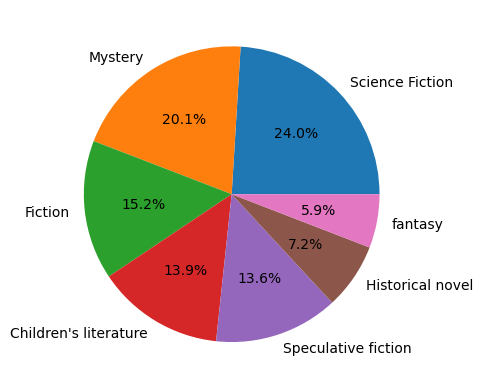

In [19]:
# Our pie chart  
import matplotlib.pyplot as plt

labels = 'Science Fiction', 'Mystery', 'Fiction', 'Children\'s literature', 'Speculative fiction', 'Historical novel', 'fantasy'

# with only 6 labels
# labels = 'Science Fiction', 'Mystery', 'Children\'s literature', 'Speculative fiction', 'Historical novel', 'fantasy'


fig, ax = plt.subplots()
ax.pie(y_train.value_counts(), labels = labels, autopct='%1.1f%%')

# Radom oversampling to balance data 

In [20]:
#  our balanced data created with Random overspampling 
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

print(X_train_ros.shape)
print(y_train_ros.shape)

(11809, 5)
(11809,)


([<matplotlib.patches.Wedge at 0x18bfb753850>,
 [Text(0.9910657451172095, 0.47727213291294374, 'Science Fiction'),
  Text(0.24477296280441296, 1.0724207181325571, 'Mystery'),
  Text(-0.68583886831644, 0.8600145619153347, 'Fiction'),
  Text(-1.0999999999999892, -1.5448414893833034e-07, "Children's literature"),
  Text(-0.6858386267552901, -0.8600147545539077, 'Speculative fiction'),
  Text(0.24477326402622548, -1.0724206493806185, 'Historical novel'),
  Text(0.9910658791734962, -0.47727185454211024, 'fantasy')])

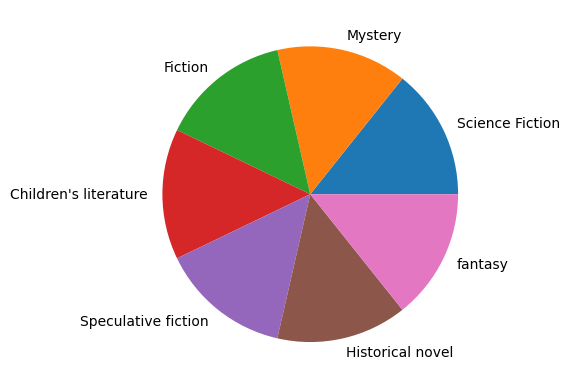

In [21]:
# Our pie chart  
import matplotlib.pyplot as plt

labels = 'Science Fiction', 'Mystery', 'Fiction', 'Children\'s literature', 'Speculative fiction', 'Historical novel', 'fantasy'

# with only 6 labels 
# labels = 'Science Fiction', 'Mystery', 'Children\'s literature', 'Speculative fiction', 'Historical novel', 'fantasy'

fig, ax = plt.subplots()
ax.pie(y_train_ros.value_counts(), labels = labels)

In [22]:
# just checking the data, probably don't need this 
y_train

15684        Science Fiction
3593         Science Fiction
3219         Science Fiction
2719                 Mystery
9334                 Mystery
                ...         
6054     Speculative fiction
12561        Science Fiction
3312     Speculative fiction
7908         Science Fiction
16137       Historical novel
Name: category, Length: 7019, dtype: object

# Bag of words, vector

In [23]:
# using a pipline at the moment 
# # turning our book descriptions into a vector
# from sklearn.feature_extraction.text import CountVectorizer
# count_vect = CountVectorizer(min_df = 5, lowercase= True, stop_words='english', max_features=2000)
# # count_vect = CountVectorizer()
# # not sure if i needed to us unicode 
# X_train_counts = count_vect.fit_transform(X_train[6].astype('U'))
# X_train_counts.shape

In [24]:
# this is just showing us where are words are at 
# count_vect.vocabulary_.get(u'algorithm')
# count_vect.vocabulary_

In [25]:
# # tf -idf stuff
# from sklearn.feature_extraction.text import TfidfTransformer

# tfidf_transformer = TfidfTransformer(use_idf=True)
# X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
# X_train_tfidf.shape

# naive bayes

In [26]:
# # trainging the model 
# from sklearn.naive_bayes import MultinomialNB
# clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [27]:
# ohh wow it does not do good i guess 7 categories so that is better than just guessing 
# print(clf.score(X_train_tfidf, y_train))
# X_train_tfidf

In [28]:
# # testing with test data 
# X_new_counts = count_vect.transform(X_test[6])
# X_new_tfidf = tfidf_transformer.transform(X_new_counts)
# predicted = clf.predict(X_new_tfidf)
# predicted


In [29]:
# # so 
# import numpy as np
# np.mean(predicted == y_test)

# NB using a pipline with unbalanced data

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

from sklearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

columns = ["algo", "data", "grid", "mean", "report", "confusion matrix"]

reports = pd.DataFrame([], columns= columns) 

reports

,algo,data,grid,mean,report,confusion matrix


In [31]:
# I am starting with a no parameters and then use Gridsearch to choose the parameters, and then rebuild it.
# I am sure there is a better way to do it but this is what I know 

# cant use this X_data_counts = vectorizer.fit_transform(X_data.values.astype('U’))

text_clf_1 = Pipeline([
#     I get this with nothing this np.mean(predicted == y_test) 0.3842963782139895
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

# I use this to run it and get  the defualt result 
# I block it out becuase I worry it might mess up my grid search I don't think this is true
text_clf_1.fit(X_train[6], y_train)
Pipeline(...)
predicted = text_clf_1.predict(X_test[6])

print(np.mean(predicted == y_test))

reports.loc[len(reports.index)] = ["NM", "unbalanced", "no", np.mean(predicted == y_test), metrics.classification_report(y_test, predicted), metrics.confusion_matrix(y_test, predicted)] 

# reports.append(metrics.classification_report(y_test, predicted))
print(metrics.classification_report(y_test, predicted))
metrics.confusion_matrix(y_test, predicted)

0.38678462814487147
                       precision    recall  f1-score   support

Children's literature       0.85      0.03      0.07       503
              Fantasy       0.00      0.00      0.00       213
              Fiction       0.77      0.02      0.04       552
     Historical novel       0.00      0.00      0.00       262
              Mystery       0.66      0.70      0.68       727
      Science Fiction       0.31      0.99      0.47       869
  Speculative fiction       1.00      0.00      0.00       491

             accuracy                           0.39      3617
            macro avg       0.51      0.25      0.18      3617
         weighted avg       0.58      0.39      0.26      3617



C:\Users\micha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\micha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\micha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\micha\anaconda3\lib\site-packages\sklearn\metr

array([[ 17,   0,   0,   0,  74, 412,   0],
       [  0,   0,   0,   0,   8, 205,   0],
       [  0,   0,  10,   0, 128, 414,   0],
       [  0,   0,   1,   0,  15, 246,   0],
       [  0,   0,   0,   0, 511, 216,   0],
       [  0,   0,   0,   0,   9, 860,   0],
       [  3,   0,   2,   0,  34, 451,   1]], dtype=int64)

In [32]:
# this chooses a range of paramenters to search 
#   'vect__analyzer': ['word', stemming] might try steeming later 
# from sklearn.model_selection import GridSearchCV
# parameters = {
#     'vect__lowercase': (True, False),  
#     'vect__stop_words': ('english', None),
#     'vect__min_df': [2, 5, 10, 15],
#     'vect__max_features': [2000, 3000, 4000, 5000],
#     'vect__ngram_range': [(1, 1), (1, 2), (1,3)],
#     'tfidf__use_idf': (True, False)

# }

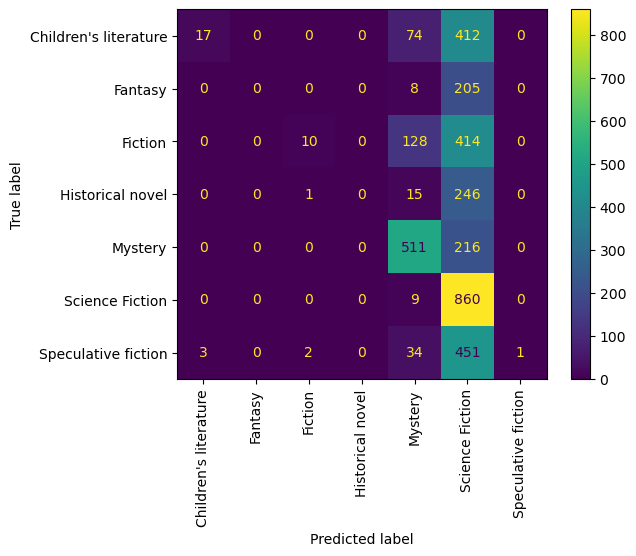

In [33]:
# print(reports['report'][0])
# print(reports['report'])

cm = confusion_matrix(y_test, predicted, labels=text_clf_1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=text_clf_1.classes_, )
disp.plot(xticks_rotation = 'vertical')
# plt.show()

# Naive bayes unbolanced data, with parameters chosen by gridsearch

In [34]:
# this actually does teh seracing and takes a really long time, you can use just part of the data
# and it goes much faster or use all teh data and let it run overnight 

# gs_clf_1 = GridSearchCV(text_clf_1, parameters, cv=5, n_jobs=-1)

# gs_clf_1 = gs_clf_1.fit(X_train[6], y_train)

# # gs_clf_1 = gs_clf_1.fit(X_train[6][:300], y_train[:300])

# print(gs_clf_1.best_score_)

# for param_name in sorted(parameters.keys()):
#     print("%s: %r" % (param_name, gs_clf_1.best_params_[param_name]))

In [35]:
# # going to block this out for now 
# # so now to make my life easier I would rebuild this using the parameters choosen by the gride search than test mt predictions

# parameters choosen by grid search
# 0.5835606646725677
# tfidf__use_idf: True
# vect__lowercase: True
# vect__max_features: 4000
# vect__min_df: 5
# vect__ngram_range: (1, 3)
# vect__stop_words: 'english'

text_clf_1 = Pipeline([
    ('vect', CountVectorizer(min_df = 5, lowercase= True, stop_words='english', max_features=4000, ngram_range=(1,3))),
    ('tfidf', TfidfTransformer(use_idf=True)),
    ('clf', MultinomialNB()),
])

# this will build my model 

text_clf_1.fit(X_train[6], y_train)
Pipeline(...)
predicted = text_clf_1.predict(X_test[6])
print(np.mean(predicted == y_test))


reports.loc[len(reports.index)] = ["Naive Bayes", "Unbalanced", "Yes", np.mean(predicted == y_test), metrics.classification_report(y_test, predicted), metrics.confusion_matrix(y_test, predicted)] 

# here i can test it 
# this should show all the metrics ohh but to show the meteric I actually need my predictions which I don't have yet 
print(metrics.classification_report(y_test, predicted))
metrics.confusion_matrix(y_test, predicted, labels=text_clf_1.classes_)




0.5980094000552945
                       precision    recall  f1-score   support

Children's literature       0.56      0.51      0.54       503
              Fantasy       0.50      0.02      0.04       213
              Fiction       0.53      0.67      0.59       552
     Historical novel       0.86      0.24      0.37       262
              Mystery       0.69      0.80      0.74       727
      Science Fiction       0.62      0.83      0.71       869
  Speculative fiction       0.45      0.34      0.39       491

             accuracy                           0.60      3617
            macro avg       0.60      0.49      0.48      3617
         weighted avg       0.60      0.60      0.57      3617



array([[258,   1,  99,   1,  45,  47,  52],
       [ 29,   4,  10,   0,  14,  75,  81],
       [ 45,   0, 371,   4,  81,  41,  10],
       [ 13,   0,  67,  62,  28,  75,  17],
       [ 23,   2,  58,   2, 579,  59,   4],
       [ 36,   0,  36,   1,  36, 723,  37],
       [ 56,   1,  63,   2,  53, 150, 166]], dtype=int64)

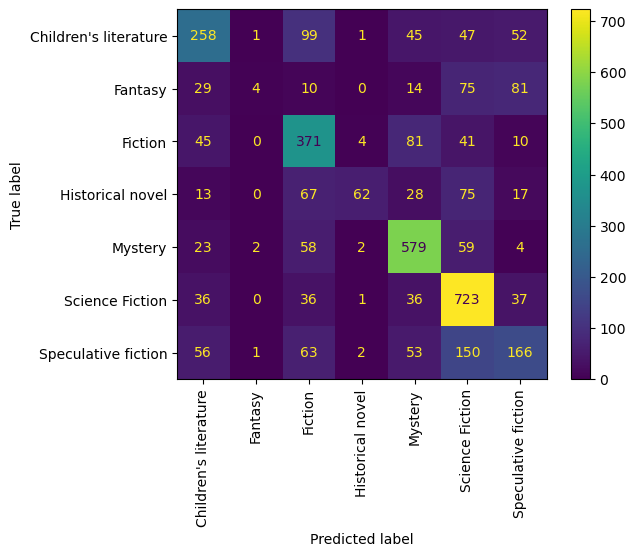

In [36]:
cm = confusion_matrix(y_test, predicted, labels=text_clf_1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=text_clf_1.classes_, )
disp.plot(xticks_rotation = 'vertical')


# Naive Bayes with ROS data

In [37]:
# I am starting with a no parameters and then use Gridsearch to choose the parameters, and then rebuild it.
# I am sure there is a better way to do it but this is what I know 

# cant use this X_data_counts = vectorizer.fit_transform(X_data.values.astype('U’))

text_clf_1_ros = Pipeline([
#     I get this with nothing this np.mean(predicted == y_test) 0.6212330660768592
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

# # maybe I will use this to test 
text_clf_1_ros.fit(X_train_ros[6], y_train_ros)
Pipeline(...)
predicted = text_clf_1_ros.predict(X_test[6])

print(np.mean(predicted == y_test))

reports.loc[len(reports.index)] = ["NB", "ROS", "NO", np.mean(predicted == y_test), metrics.classification_report(y_test, predicted), metrics.confusion_matrix(y_test, predicted)] 


print(metrics.classification_report(y_test, predicted))
metrics.confusion_matrix(y_test, predicted)



0.626762510367708
                       precision    recall  f1-score   support

Children's literature       0.54      0.67      0.60       503
              Fantasy       0.34      0.60      0.44       213
              Fiction       0.61      0.55      0.58       552
     Historical novel       0.40      0.79      0.53       262
              Mystery       0.84      0.73      0.78       727
      Science Fiction       0.83      0.72      0.77       869
  Speculative fiction       0.60      0.28      0.38       491

             accuracy                           0.63      3617
            macro avg       0.60      0.62      0.58      3617
         weighted avg       0.67      0.63      0.63      3617



array([[338,  43,  44,  33,  11,   9,  25],
       [ 27, 128,   4,   7,   2,  19,  26],
       [ 84,   8, 302, 112,  31,  10,   5],
       [ 12,   3,  23, 206,   5,  11,   2],
       [ 46,  12,  51,  57, 528,  26,   7],
       [ 49,  62,  26,  59,  20, 629,  24],
       [ 71, 117,  45,  41,  28,  53, 136]], dtype=int64)

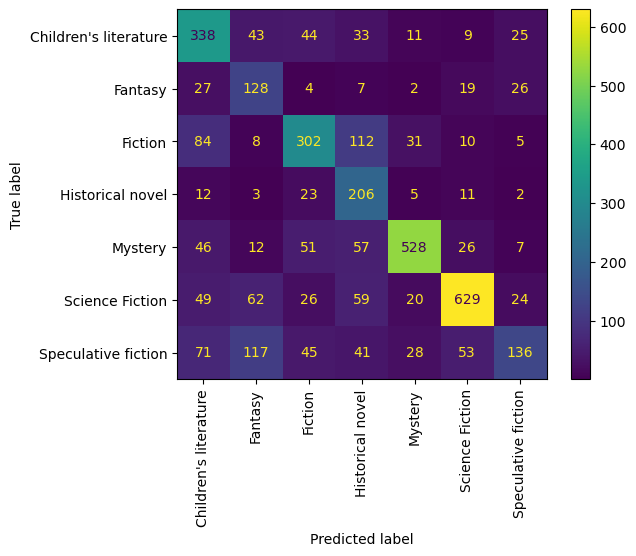

In [38]:
cm = confusion_matrix(y_test, predicted, labels=text_clf_1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=text_clf_1_ros.classes_, )
disp.plot(xticks_rotation = 'vertical')


In [39]:
# The grid search 
# this chooses a range of paramenters to search 
#   'vect__analyzer': ['word', stemming] might try steeming later 
# from sklearn.model_selection import GridSearchCV
# parameters = {
#     'vect__lowercase': (True, False),  
#     'vect__stop_words': ('english', None),
#     'vect__min_df': [2, 5, 10, 15],
#     'vect__max_features': [2000, 3000, 4000, 5000],
#     'vect__ngram_range': [(1, 1), (1, 2), (1,3)],
#     'tfidf__use_idf': (True, False)

# }

In [40]:
# this actually does the seracing and takes a really long time, you can use just part of the data
# and it goes much faster or use all teh data and let it run overnight 

# gs_clf_1_ros = GridSearchCV(text_clf_1_ros, parameters, cv=5, n_jobs=-1)

# gs_clf_1_ros = gs_clf_1_ros.fit(X_train_ros[6], y_train_ros)

# # gs_clf_1_ros = gs_clf_1_ros.fit(X_train_ros[6][:300], y_train_ros[:300])

# print(gs_clf_1_ros.best_score_)

# for param_name in sorted(parameters.keys()):
#     print("%s: %r" % (param_name, gs_clf_1_ros.best_params_[param_name]))

In [41]:
# # so now to make my life easier I would rebuild this using the parameters choosen by the gride search than test mt predictions

# Parameter choosen bt grid search
# 0.7015863554708696
# tfidf__use_idf: True
# vect__lowercase: True
# vect__max_features: 5000
# vect__min_df: 2
# vect__ngram_range: (1, 1)
# vect__stop_words: 'english'

from sklearn.pipeline import Pipeline
text_clf_1_ros = Pipeline([
    ('vect', CountVectorizer(min_df = 2, lowercase= True, stop_words='english', max_features=5000, ngram_range=(1,1))),
    ('tfidf', TfidfTransformer(use_idf=True)),
    ('clf', MultinomialNB()),
])

# # this will build my model 

text_clf_1_ros.fit(X_train_ros[6], y_train_ros)
Pipeline(...)
predicted = text_clf_1_ros.predict(X_test[6])
print(np.mean(predicted == y_test))

reports.loc[len(reports.index)] = ["NM", "ROS", "Yes", np.mean(predicted == y_test), metrics.classification_report(y_test, predicted), metrics.confusion_matrix(y_test, predicted)] 


# here i can test it 
# this should show all the metrics ohh but to show the meteric I actually need my predictions which I don't have yet 
from sklearn import metrics
print(metrics.classification_report(y_test, predicted))
metrics.confusion_matrix(y_test, predicted)

0.615980094000553
                       precision    recall  f1-score   support

Children's literature       0.54      0.58      0.56       503
              Fantasy       0.34      0.43      0.38       213
              Fiction       0.54      0.66      0.59       552
     Historical novel       0.50      0.63      0.56       262
              Mystery       0.79      0.74      0.76       727
      Science Fiction       0.81      0.71      0.75       869
  Speculative fiction       0.46      0.33      0.39       491

             accuracy                           0.62      3617
            macro avg       0.57      0.58      0.57      3617
         weighted avg       0.63      0.62      0.62      3617



array([[294,  31,  79,  21,  22,  13,  43],
       [ 26,  92,  10,   3,   7,  19,  56],
       [ 60,   4, 364,  53,  44,  11,  16],
       [ 14,   2,  45, 166,   8,  17,  10],
       [ 36,  12,  77,  31, 535,  24,  12],
       [ 45,  47,  47,  34,  29, 613,  54],
       [ 66,  85,  58,  23,  36,  59, 164]], dtype=int64)

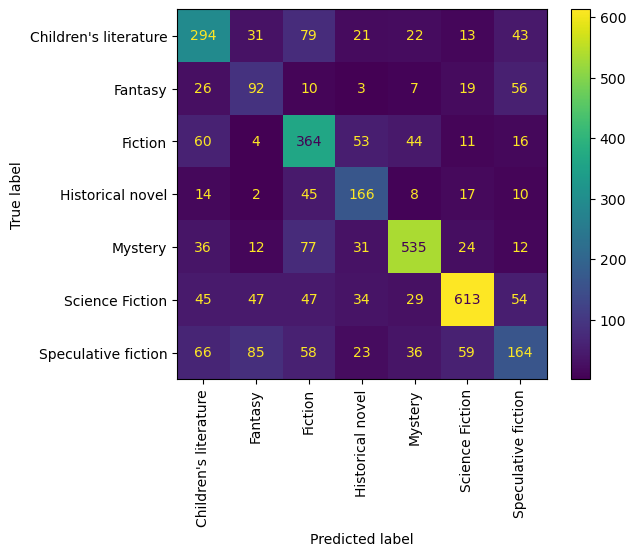

In [42]:
cm = confusion_matrix(y_test, predicted, labels=text_clf_1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=text_clf_1_ros.classes_, )
disp.plot(xticks_rotation = 'vertical')

# Support Vector Machines (SVM) classifier, did we learn this??

In [43]:
# so if you want to inlcude gridsearch should you exclude those parameters??
# internet is not telling me, will assume you need to at the moment 


text_clf_2 = Pipeline([
#   np.mean(predicted == y_test) =   0.643074371025712
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', SGDClassifier(loss='hinge', penalty='l2', random_state=42,
                           max_iter=5, tol=None)),
])

# # is this needed looks like no
text_clf_2.fit(X_train[6], y_train)
Pipeline(...)
predicted = text_clf_2.predict(X_test[6])

reports.loc[len(reports.index)] = ["SVM", "unbalanced", "NO", np.mean(predicted == y_test), metrics.classification_report(y_test, predicted), metrics.confusion_matrix(y_test, predicted)] 


from sklearn import metrics
print(np.mean(predicted == y_test))

print(metrics.classification_report(y_test, predicted))
metrics.confusion_matrix(y_test, predicted)

0.6488802875311032
                       precision    recall  f1-score   support

Children's literature       0.58      0.64      0.61       503
              Fantasy       0.52      0.22      0.31       213
              Fiction       0.60      0.63      0.62       552
     Historical novel       0.66      0.52      0.58       262
              Mystery       0.72      0.82      0.77       727
      Science Fiction       0.69      0.85      0.76       869
  Speculative fiction       0.53      0.32      0.40       491

             accuracy                           0.65      3617
            macro avg       0.62      0.57      0.58      3617
         weighted avg       0.64      0.65      0.63      3617



array([[323,  11,  55,   9,  35,  32,  38],
       [ 26,  47,   7,   3,  16,  61,  53],
       [ 56,   0, 348,  27,  69,  36,  16],
       [ 18,   1,  41, 137,  15,  44,   6],
       [ 30,   3,  48,  11, 597,  33,   5],
       [ 32,   6,  25,   9,  39, 736,  22],
       [ 70,  22,  55,  13,  55, 117, 159]], dtype=int64)

In [44]:
# from sklearn.model_selection import GridSearchCV
# parameters = {
#     'vect__lowercase': (True, False),  
#     'vect__stop_words': ('english', None),
#     'vect__min_df': [2, 5, 10, 15],
#     'vect__max_features': [2000, 3000, 4000, 5000],
#     'vect__ngram_range': [(1, 1), (1, 2), (1,3)],
#     'tfidf__use_idf': (True, False),
#     'clf__alpha': (1e-1, 1e-2, 1e-3),
# }

In [45]:
# gs_clf_2 = GridSearchCV(text_clf_2, parameters, cv=5, n_jobs=-1)

# # or is this the fitting, this is the part that takes a long time  
# # a small portation
# gs_clf_2 = gs_clf_2.fit(X_train[6][:500], y_train[:500])
# # all of it 
# # gs_clf_2 = gs_clf_2.fit(X_train[6], y_train)

In [46]:
# # so now AM I using the best model or do I need to go back and put this in the model?
# print(gs_clf_2.best_score_)

# for param_name in sorted(parameters.keys()):
#     print("%s: %r" % (param_name, gs_clf_2.best_params_[param_name]))

In [47]:
# # so I ran the gridsearch over night and got these results   

# unbalanced
# 0.593532885371802
# clf__alpha: 0.001
# tfidf__use_idf: True
# vect__lowercase: True
# vect__max_features: 5000
# vect__min_df: 2
# vect__ngram_range: (1, 3)
# vect__stop_words: 'english'


from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
text_clf_2 = Pipeline([
     ('vect', CountVectorizer(stop_words = 'english', ngram_range= (1,3), min_df = 2, max_features = 5000, lowercase = True)),
     ('tfidf', TfidfTransformer(use_idf=True)),
     ('clf', SGDClassifier(loss='hinge', penalty='l2',
                           alpha=1e-3, random_state=42,
                           max_iter=5, tol=None)),
])

text_clf_2.fit(X_train[6], y_train)
Pipeline(...)
predicted = text_clf_2.predict(X_test[6])
print(np.mean(predicted == y_test))

reports.loc[len(reports.index)] = ["SVM", "unbalanced", "Yes", np.mean(predicted == y_test), metrics.classification_report(y_test, predicted), metrics.confusion_matrix(y_test, predicted)] 


# should propably double check this so this is really good  but I need to have predicted something 
# from sklearn import metrics
print(metrics.classification_report(y_test, predicted))
metrics.confusion_matrix(y_test, predicted)

0.5980094000552945
                       precision    recall  f1-score   support

Children's literature       0.57      0.55      0.56       503
              Fantasy       0.48      0.13      0.21       213
              Fiction       0.62      0.54      0.58       552
     Historical novel       0.64      0.35      0.46       262
              Mystery       0.63      0.85      0.72       727
      Science Fiction       0.59      0.86      0.70       869
  Speculative fiction       0.49      0.20      0.29       491

             accuracy                           0.60      3617
            macro avg       0.57      0.50      0.50      3617
         weighted avg       0.58      0.60      0.56      3617



array([[276,   9,  52,   9,  59,  69,  29],
       [ 26,  28,   7,   3,  27,  82,  40],
       [ 55,   0, 299,  19, 113,  55,  11],
       [ 18,   0,  40,  93,  33,  72,   6],
       [ 23,   3,  25,   5, 618,  48,   5],
       [ 22,   8,  18,   4,  53, 749,  15],
       [ 61,  10,  44,  13,  79, 184, 100]], dtype=int64)

# SVM with ROS 

In [48]:
# so if you want to inlcude gridsearch should you exclude those parameters??
# internet is not telling me, will assume you need to at the moment 
# seem to do slighlt better with fewer parameters of maybe whatever is default 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
text_clf_2_ros = Pipeline([
#   np.mean(predicted == y_test) =   0.643074371025712
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', SGDClassifier(loss='hinge', penalty='l2', random_state=42,
                           max_iter=5, tol=None)),
])

# is this needed looks like no
text_clf_2_ros.fit(X_train_ros[6], y_train_ros)
Pipeline(...)
predicted = text_clf_2_ros.predict(X_test[6])
print(np.mean(predicted == y_test))

reports.loc[len(reports.index)] = ["SVM", "ROS", "NO", np.mean(predicted == y_test), metrics.classification_report(y_test, predicted), metrics.confusion_matrix(y_test, predicted)] 


print(metrics.classification_report(y_test, predicted))
metrics.confusion_matrix(y_test, predicted)


0.6447332043129665
                       precision    recall  f1-score   support

Children's literature       0.56      0.66      0.61       503
              Fantasy       0.41      0.39      0.40       213
              Fiction       0.60      0.60      0.60       552
     Historical novel       0.54      0.61      0.57       262
              Mystery       0.77      0.79      0.78       727
      Science Fiction       0.75      0.79      0.77       869
  Speculative fiction       0.53      0.34      0.41       491

             accuracy                           0.64      3617
            macro avg       0.59      0.60      0.59      3617
         weighted avg       0.64      0.64      0.64      3617



array([[332,  22,  49,  18,  24,  20,  38],
       [ 26,  84,   6,   3,  10,  42,  42],
       [ 72,   7, 331,  53,  56,  18,  15],
       [ 16,   2,  36, 159,  10,  29,  10],
       [ 35,   4,  49,  21, 577,  29,  12],
       [ 40,  28,  26,  20,  40, 683,  32],
       [ 70,  58,  55,  20,  36,  86, 166]], dtype=int64)

In [49]:
# # here we let the gridsearch do it's business 
# gs_clf_2_ros = GridSearchCV(text_clf_2_ros, parameters, cv=5, n_jobs=-1)
# gs_clf_2_ros = gs_clf_2_ros.fit(X_train_ros[6][:300], y_train_ros[:300])

# print(gs_clf_2_ros.best_score_)

# for param_name in sorted(parameters.keys()):
#     print("%s: %r" % (param_name, gs_clf_2_ros.best_params_[param_name]))

In [50]:
# I got these results from running the parameter all night 
# 0.7387630852897835
# clf__alpha: 0.001
# tfidf__use_idf: True
# vect__lowercase: True
# vect__max_features: 5000
# vect__min_df: 2
# vect__ngram_range: (1, 1)
# vect__stop_words: 'english'

# so we build the model 

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
text_clf_2_ros = Pipeline([
     ('vect', CountVectorizer(stop_words = 'english', ngram_range = (1,1), min_df = 2, max_features = 5000, lowercase = True )),
     ('tfidf', TfidfTransformer(use_idf = True)),
     ('clf', SGDClassifier(loss='hinge', penalty='l2', random_state=42, alpha=1e-3, 
                           max_iter=5, tol=None)),
])

# is this needed looks like no
text_clf_2_ros.fit(X_train_ros[6], y_train_ros)
Pipeline(...)
predicted = text_clf_2_ros.predict(X_test[6])

print(np.mean(predicted == y_test))

# so it lets me use it like a predection but is it using what I want it to
from sklearn import metrics

print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))

test = metrics.classification_report(y_test, predicted)

reports.loc[len(reports.index)] = ["SVM", "ROS", "Yes", np.mean(predicted == y_test), metrics.classification_report(y_test, predicted), metrics.confusion_matrix(y_test, predicted)] 


print(test)

0.5944152612662428
                       precision    recall  f1-score   support

Children's literature       0.57      0.58      0.58       503
              Fantasy       0.30      0.43      0.35       213
              Fiction       0.62      0.48      0.54       552
     Historical novel       0.40      0.67      0.50       262
              Mystery       0.69      0.81      0.74       727
      Science Fiction       0.74      0.75      0.75       869
  Speculative fiction       0.44      0.17      0.25       491

             accuracy                           0.59      3617
            macro avg       0.54      0.56      0.53      3617
         weighted avg       0.60      0.59      0.58      3617

[[292  37  38  35  46  22  33]
 [ 21  91   6  11  17  44  23]
 [ 62  17 267  96  77  21  12]
 [ 13   3  31 176  14  23   2]
 [ 26   9  28  38 586  29  11]
 [ 33  42  22  43  47 654  28]
 [ 63 107  42  42  60  93  84]]
                       precision    recall  f1-score   support

Chi

# All the results

In [51]:
for i in range(len(reports)):
    print(reports['algo'][i], reports['data'][i], reports['grid'][i], reports['mean'][i])
    print(reports['report'][i])

NM unbalanced no 0.38678462814487147
                       precision    recall  f1-score   support

Children's literature       0.85      0.03      0.07       503
              Fantasy       0.00      0.00      0.00       213
              Fiction       0.77      0.02      0.04       552
     Historical novel       0.00      0.00      0.00       262
              Mystery       0.66      0.70      0.68       727
      Science Fiction       0.31      0.99      0.47       869
  Speculative fiction       1.00      0.00      0.00       491

             accuracy                           0.39      3617
            macro avg       0.51      0.25      0.18      3617
         weighted avg       0.58      0.39      0.26      3617

Naive Bayes Unbalanced Yes 0.5980094000552945
                       precision    recall  f1-score   support

Children's literature       0.56      0.51      0.54       503
              Fantasy       0.50      0.02      0.04       213
              Fiction       0.5

NM unbalanced no 0.38678462814487147
Naive Bayes Unbalanced Yes 0.5980094000552945
NB ROS NO 0.626762510367708
NM ROS Yes 0.615980094000553
SVM unbalanced NO 0.6488802875311032
SVM unbalanced Yes 0.5980094000552945
SVM ROS NO 0.6447332043129665
SVM ROS Yes 0.5944152612662428


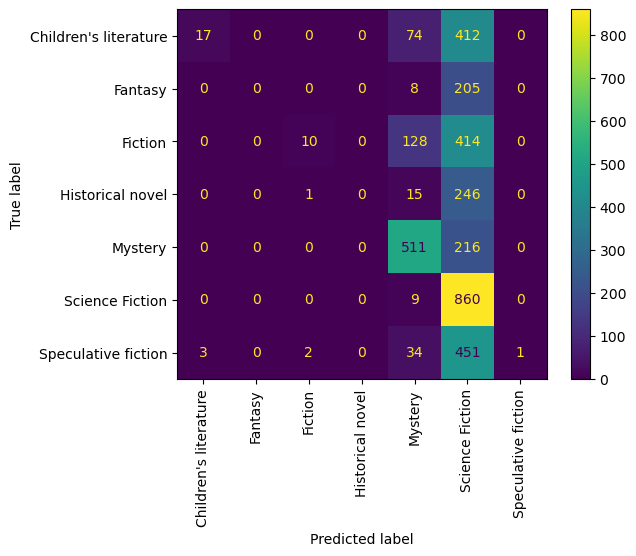

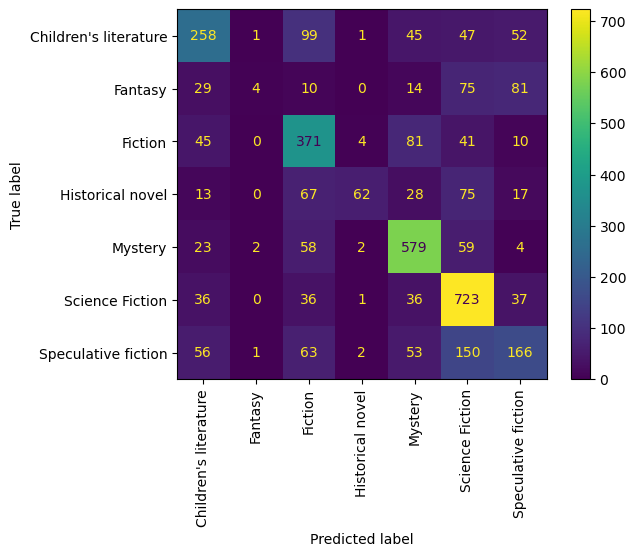

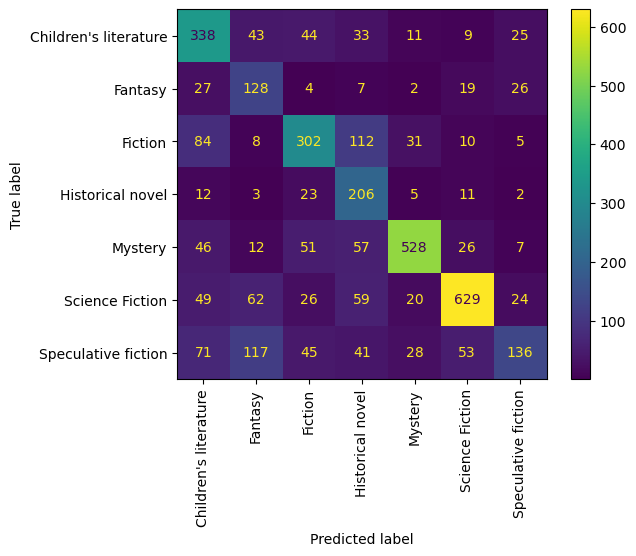

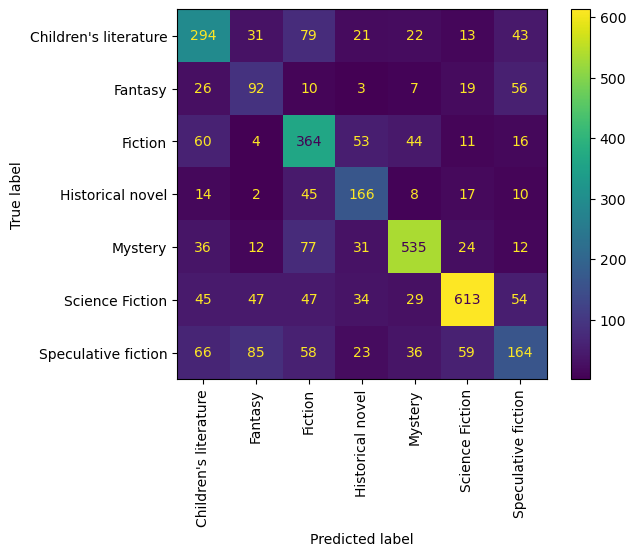

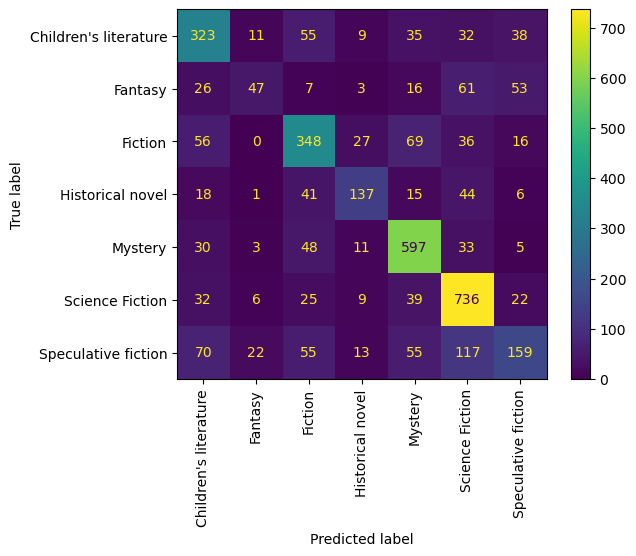

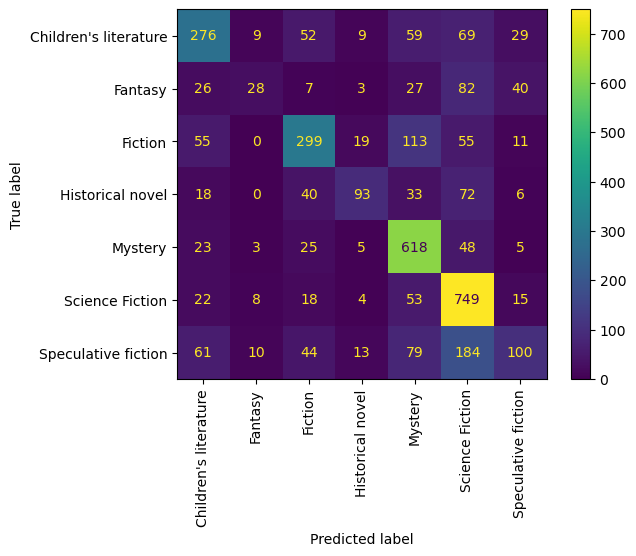

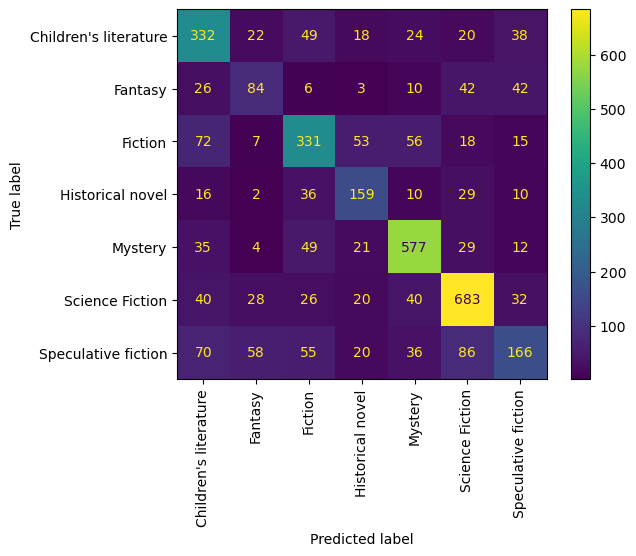

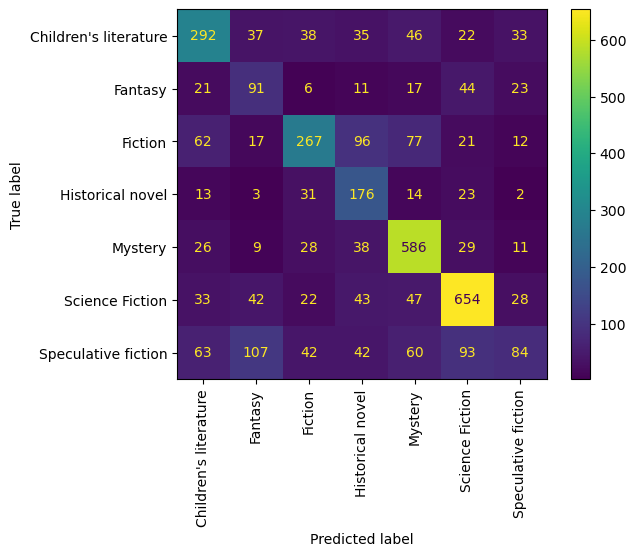

In [52]:
for i in range(len(reports)):
#     cm = confusion_matrix(y_test, predicted, labels=text_clf_1.classes_)
    print(reports['algo'][i], reports['data'][i], reports['grid'][i], reports['mean'][i])
    disp = ConfusionMatrixDisplay(confusion_matrix=reports['confusion matrix'][i], display_labels=text_clf_1_ros.classes_, )
    disp.plot(xticks_rotation = 'vertical')

# a simpler problem

In [53]:
simplified_data = data_2.loc[(data_2['category'] == 'Science Fiction') | (data_2['category'] == 'Mystery') 
| (data_2['category'] == 'Fiction') | (data_2['category'] == 'Children\'s literature')]

simplified_data

,2,3,4,5,category,6
1,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...",Science Fiction,"Alex, a teenager living in near-future Englan..."
6,A Wizard of Earthsea,Ursula K. Le Guin,1968,"{""/m/0dwly"": ""Children's literature"", ""/m/01hm...",Children's literature,"Ged is a young boy on Gont, one of the larger..."
8,Blade Runner 3: Replicant Night,K. W. Jeter,1996-10-01,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,"Living on Mars, Deckard is acting as a consul..."
9,Blade Runner 2: The Edge of Human,K. W. Jeter,1995-10-01,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,Beginning several months after the events in ...
21,Children of Dune,Frank Herbert,1976,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,Nine years after Emperor Paul Muad'dib walked...
...,...,...,...,...,...,...
16541,Nevermore: The Final Maximum Ride Adventure,James Patterson,2012-08-06,"{""/m/03mfnf"": ""Young adult literature""}",Children's literature,The prologue is Angel's vision of Max's death...
16542,The Bourne Imperative,Robert Ludlum,2012-06-05,"{""/m/01jfsb"": ""Thriller"", ""/m/06wkf"": ""Spy fic...",Mystery,:For a more detailed background of the main c...
16549,The Third Lynx,Timothy Zahn,2007,"{""/m/06n90"": ""Science Fiction""}",Science Fiction,The story starts with former government agent...
16551,Remote Control,Andy McNab,1997,"{""/m/01jfsb"": ""Thriller"", ""/m/02xlf"": ""Fiction...",Mystery,The series follows the character of Nick Ston...


In [54]:
y = simplified_data['category']

print(y)

simplified_data = simplified_data.drop(columns=['category'])

print(simplified_data)

1              Science Fiction
6        Children's literature
8              Science Fiction
9              Science Fiction
21             Science Fiction
                 ...          
16541    Children's literature
16542                  Mystery
16549          Science Fiction
16551                  Mystery
16555                  Mystery
Name: category, Length: 7797, dtype: object
                                                 2                  3  \
1                               A Clockwork Orange    Anthony Burgess   
6                             A Wizard of Earthsea  Ursula K. Le Guin   
8                  Blade Runner 3: Replicant Night        K. W. Jeter   
9                Blade Runner 2: The Edge of Human        K. W. Jeter   
21                                Children of Dune      Frank Herbert   
...                                            ...                ...   
16541  Nevermore: The Final Maximum Ride Adventure    James Patterson   
16542                        Th

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(simplified_data, y,
                                                stratify=y, 
                                                test_size=0.34)

# NB simple data, parameters from grid search

In [56]:
# # going to block this out for now 
# # so now to make my life easier I would rebuild this using the parameters choosen by the gride search than test mt predictions

# parameters choosen by grid search
# 0.5835606646725677
# tfidf__use_idf: True
# vect__lowercase: True
# vect__max_features: 4000
# vect__min_df: 5
# vect__ngram_range: (1, 3)
# vect__stop_words: 'english'

text_clf_1 = Pipeline([
    ('vect', CountVectorizer(min_df = 5, lowercase= True, stop_words='english', max_features=4000, ngram_range=(1,3))),
    ('tfidf', TfidfTransformer(use_idf=True)),
    ('clf', MultinomialNB()),
])

# this will build my model 

text_clf_1.fit(X_train[6], y_train)
Pipeline(...)
predicted = text_clf_1.predict(X_test[6])
print(np.mean(predicted == y_test))


reports.loc[len(reports.index)] = ["Naive Bayes", "Unbalanced and simplified", "Yes", np.mean(predicted == y_test), metrics.classification_report(y_test, predicted), metrics.confusion_matrix(y_test, predicted)] 

# here i can test it 
# this should show all the metrics ohh but to show the meteric I actually need my predictions which I don't have yet 
print(metrics.classification_report(y_test, predicted))
metrics.confusion_matrix(y_test, predicted, labels=text_clf_1.classes_)

0.7461335345152773
                       precision    recall  f1-score   support

Children's literature       0.71      0.60      0.65       503
              Fiction       0.67      0.63      0.65       552
              Mystery       0.74      0.81      0.77       727
      Science Fiction       0.82      0.86      0.83       869

             accuracy                           0.75      2651
            macro avg       0.73      0.72      0.73      2651
         weighted avg       0.74      0.75      0.74      2651



array([[300,  83,  59,  61],
       [ 55, 347,  94,  56],
       [ 34,  54, 588,  51],
       [ 33,  37,  56, 743]], dtype=int64)

# SVM with simple data 

In [57]:
# so if you want to inlcude gridsearch should you exclude those parameters??
# internet is not telling me, will assume you need to at the moment 


text_clf_2 = Pipeline([
#   np.mean(predicted == y_test) =   0.643074371025712
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', SGDClassifier(loss='hinge', penalty='l2', random_state=42,
                           max_iter=5, tol=None)),
])

# # is this needed looks like no
text_clf_2.fit(X_train[6], y_train)
Pipeline(...)
predicted = text_clf_2.predict(X_test[6])

reports.loc[len(reports.index)] = ["SVM", "unbalanced - simplified", "NO", np.mean(predicted == y_test), metrics.classification_report(y_test, predicted), metrics.confusion_matrix(y_test, predicted)] 


from sklearn import metrics
print(np.mean(predicted == y_test))

# so Yes it seems to do much better with that 
print(metrics.classification_report(y_test, predicted))
metrics.confusion_matrix(y_test, predicted)

0.7706525839305922
                       precision    recall  f1-score   support

Children's literature       0.71      0.67      0.69       503
              Fiction       0.68      0.64      0.66       552
              Mystery       0.75      0.83      0.79       727
      Science Fiction       0.88      0.86      0.87       869

             accuracy                           0.77      2651
            macro avg       0.75      0.75      0.75      2651
         weighted avg       0.77      0.77      0.77      2651



array([[335,  71,  58,  39],
       [ 68, 355,  93,  36],
       [ 35,  57, 605,  30],
       [ 34,  37,  50, 748]], dtype=int64)

# Clustering with the data I cluseterd 

In [58]:
# turning our book descriptions into a vector

count_vect = CountVectorizer(min_df = 5, lowercase= True, stop_words='english', max_features=2000)
# does not seem to good with that 
# count_vect = CountVectorizer()

# not sure if i needed to us unicode 
X_train_counts = count_vect.fit_transform(data_4[6].astype('U'))
X_train_counts.shape

# this is just showing us where are words are at 
count_vect.vocabulary_.get(u'algorithm')
count_vect.vocabulary_

# tf -idf stuff
# from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer(use_idf=True)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(10636, 2000)

In [59]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(X_train_tfidf)
kmeans.labels_
kmeans.cluster_centers_




array([[0.00524323, 0.00187997, 0.00086509, ..., 0.00974466, 0.0023988 ,
        0.00176507],
       [0.00179895, 0.00091726, 0.00162423, ..., 0.01486028, 0.00365536,
        0.00271647],
       [0.00222685, 0.00257514, 0.00264487, ..., 0.02341988, 0.00907277,
        0.00244091],
       [0.00192328, 0.00138204, 0.00158358, ..., 0.0141392 , 0.0025603 ,
        0.00120385],
       [0.00231353, 0.00206022, 0.00110951, ..., 0.01573919, 0.00294322,
        0.00344177]])

In [60]:

data_labels = data_4.copy()



# zero_cat = data_labels[data_labels['labels'] == 0]

# one_cat = data_labels[data_labels['labels'] == 1]

# two_cat = data_labels[data_labels['labels'] == 2]

# three_cat = data_labels[data_labels['labels'] == 3]

# four_cat = data_labels[data_labels['labels'] == 4]
# data_labels['labels'] = kmeans.labels_

data_labels.insert(6, 'label', kmeans.labels_)

data_4

,2,3,4,5,category,6
1,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...",Science Fiction,"Alex, a teenager living in near-future Englan..."
5,All Quiet on the Western Front,Erich Maria Remarque,1929-01-29,"{""/m/098tmk"": ""War novel"", ""/m/016lj8"": ""Roman...",Historical novel,"The book tells the story of Paul Bäumer, a Ge..."
6,A Wizard of Earthsea,Ursula K. Le Guin,1968,"{""/m/0dwly"": ""Children's literature"", ""/m/01hm...",Children's literature,"Ged is a young boy on Gont, one of the larger..."
8,Blade Runner 3: Replicant Night,K. W. Jeter,1996-10-01,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,"Living on Mars, Deckard is acting as a consul..."
9,Blade Runner 2: The Edge of Human,K. W. Jeter,1995-10-01,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,Beginning several months after the events in ...
...,...,...,...,...,...,...
16541,Nevermore: The Final Maximum Ride Adventure,James Patterson,2012-08-06,"{""/m/03mfnf"": ""Young adult literature""}",Children's literature,The prologue is Angel's vision of Max's death...
16542,The Bourne Imperative,Robert Ludlum,2012-06-05,"{""/m/01jfsb"": ""Thriller"", ""/m/06wkf"": ""Spy fic...",Mystery,:For a more detailed background of the main c...
16549,The Third Lynx,Timothy Zahn,2007,"{""/m/06n90"": ""Science Fiction""}",Science Fiction,The story starts with former government agent...
16551,Remote Control,Andy McNab,1997,"{""/m/01jfsb"": ""Thriller"", ""/m/02xlf"": ""Fiction...",Mystery,The series follows the character of Nick Ston...


In [61]:
data_labels
# data_labels.reset_index()

  

,2,3,4,5,category,6,label
1,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...",Science Fiction,"Alex, a teenager living in near-future Englan...",3
5,All Quiet on the Western Front,Erich Maria Remarque,1929-01-29,"{""/m/098tmk"": ""War novel"", ""/m/016lj8"": ""Roman...",Historical novel,"The book tells the story of Paul Bäumer, a Ge...",2
6,A Wizard of Earthsea,Ursula K. Le Guin,1968,"{""/m/0dwly"": ""Children's literature"", ""/m/01hm...",Children's literature,"Ged is a young boy on Gont, one of the larger...",1
8,Blade Runner 3: Replicant Night,K. W. Jeter,1996-10-01,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,"Living on Mars, Deckard is acting as a consul...",3
9,Blade Runner 2: The Edge of Human,K. W. Jeter,1995-10-01,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,Beginning several months after the events in ...,3
...,...,...,...,...,...,...,...
16541,Nevermore: The Final Maximum Ride Adventure,James Patterson,2012-08-06,"{""/m/03mfnf"": ""Young adult literature""}",Children's literature,The prologue is Angel's vision of Max's death...,3
16542,The Bourne Imperative,Robert Ludlum,2012-06-05,"{""/m/01jfsb"": ""Thriller"", ""/m/06wkf"": ""Spy fic...",Mystery,:For a more detailed background of the main c...,3
16549,The Third Lynx,Timothy Zahn,2007,"{""/m/06n90"": ""Science Fiction""}",Science Fiction,The story starts with former government agent...,3
16551,Remote Control,Andy McNab,1997,"{""/m/01jfsb"": ""Thriller"", ""/m/02xlf"": ""Fiction...",Mystery,The series follows the character of Nick Ston...,4


In [73]:
# categories = [zero_cat, one_cat, two_cat, three_cat]

# for i in range(len(categories)):
#     print(i)
#     print(len(categories[i]['category']))
#     print(categories[i]['category'].value_counts())    

print(len(data_labels))

for i in range(5):
#     print('hello')
    print(i)
    print(len(data_labels[data_labels['label'] == i]))
    print(data_labels[data_labels['label'] == i]['category'].value_counts())    

# print('0')
# print(zero_cat['category'].value_counts())

# print('1')
# print(one_cat['category'].value_counts())

# print('2')
# print(two_cat['category'].value_counts())

# print(3)
# print(three_cat['category'].value_counts())

# print(4)
# print(four_cat['category'].value_counts())

10636
0
1239
Science Fiction          1033
Speculative fiction        77
Historical novel           54
Mystery                    31
Children's literature      17
Fantasy                    17
Fiction                    10
Name: category, dtype: int64
1
1426
Speculative fiction      469
Science Fiction          277
Fantasy                  271
Children's literature    203
Historical novel         138
Mystery                   44
Fiction                   24
Name: category, dtype: int64
2
2049
Fiction                  631
Children's literature    580
Mystery                  288
Speculative fiction      213
Science Fiction          142
Historical novel         136
Fantasy                   59
Name: category, dtype: int64
3
4065
Mystery                  1536
Science Fiction           655
Children's literature     597
Fiction                   470
Speculative fiction       443
Fantasy                   191
Historical novel          173
Name: category, dtype: int64
4
1857
Fiction          

In [63]:
data_labels[(data_labels['label'] == 3) & (data_labels['category'] != 'Mystery')].head(50)

,2,3,4,5,category,6,label
1,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...",Science Fiction,"Alex, a teenager living in near-future Englan...",3
8,Blade Runner 3: Replicant Night,K. W. Jeter,1996-10-01,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,"Living on Mars, Deckard is acting as a consul...",3
9,Blade Runner 2: The Edge of Human,K. W. Jeter,1995-10-01,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,Beginning several months after the events in ...,3
20,Crash,J. G. Ballard,1973,"{""/m/014dfn"": ""Speculative fiction"", ""/m/02xlf...",Speculative fiction,The story is told through the eyes of narrato...,3
29,Dune Messiah,Frank Herbert,1969,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,Twelve years after the events described in Du...,3
47,Johnny Got His Gun,Dalton Trumbo,1939,"{""/m/02xlf"": ""Fiction"", ""/m/05hgj"": ""Novel""}",Fiction,"Joe Bonham, a young soldier serving in World ...",3
48,Icehenge,Kim Stanley Robinson,1984,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,"Icehenge is part mystery, part psychological ...",3
63,A Scanner Darkly,Philip K. Dick,1977,"{""/m/06n90"": ""Science Fiction"", ""/m/059r08"": ""...",Science Fiction,"The protagonist is Bob Arctor, member of a ho...",3
81,The Shockwave Rider,John Brunner,1975,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,The novel is set in the weeks following Nick'...,3
98,Lord of the Flies,William Golding,1954,"{""/m/014dfn"": ""Speculative fiction"", ""/m/03mfn...",Speculative fiction,"In the midst of a wartime evacuation, a Briti...",3


# Data I did not cluster 

In [64]:
cluster.insert(4, "category", category, True)




In [65]:
cluster

# turning our book descriptions into a vector

count_vect = CountVectorizer(min_df = 5, lowercase= True, stop_words='english', max_features=5000)
# does not seem to good with that 
# count_vect = CountVectorizer()

# not sure if i needed to us unicode 
X_train_counts = count_vect.fit_transform(cluster[6].astype('U'))
X_train_counts.shape

# this is just showing us where are words are at 
count_vect.vocabulary_.get(u'algorithm')
count_vect.vocabulary_

# tf -idf stuff
# from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer(use_idf=True)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(12841, 5000)

In [66]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(X_train_tfidf)
len(kmeans.labels_)
# kmeans.cluster_centers_

12841

In [67]:
cluster.insert(6, 'label', kmeans.labels_)

cluster

,2,3,4,5,category,6,label
0,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...",Roman à clef,"Old Major, the old boar on the Manor Farm, ca...",0
1,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...",Science Fiction,"Alex, a teenager living in near-future Englan...",0
2,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",Existentialism,The text of The Plague is divided into five p...,3
4,A Fire Upon the Deep,Vernor Vinge,NaN,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",Hard science fiction,The novel posits that space around the Milky ...,1
5,All Quiet on the Western Front,Erich Maria Remarque,1929-01-29,"{""/m/098tmk"": ""War novel"", ""/m/016lj8"": ""Roman...",War novel,"The book tells the story of Paul Bäumer, a Ge...",3
...,...,...,...,...,...,...,...
16549,The Third Lynx,Timothy Zahn,2007,"{""/m/06n90"": ""Science Fiction""}",Science Fiction,The story starts with former government agent...,0
16551,Remote Control,Andy McNab,1997,"{""/m/01jfsb"": ""Thriller"", ""/m/02xlf"": ""Fiction...",Thriller,The series follows the character of Nick Ston...,0
16555,Transfer of Power,Vince Flynn,2000-06-01,"{""/m/01jfsb"": ""Thriller"", ""/m/02xlf"": ""Fiction""}",Thriller,The reader first meets Rapp while he is doing...,0
16556,Decoded,Jay-Z,2010-11-16,"{""/m/0xdf"": ""Autobiography""}",Autobiography,The book follows very rough chronological ord...,2


In [68]:
cluster['category'].value_counts()

Science Fiction            2556
Speculative fiction        1444
Children's literature      1159
Novel                       839
Fiction                     783
                           ... 
Catastrophic literature       1
School story                  1
Collage                       1
Social criticism              1
Pornography                   1
Name: category, Length: 180, dtype: int64

In [69]:
print(len(cluster))

for i in range(5):
#     print('hello')
    print("label ", + i)
    print(len(cluster[cluster['label'] == i]))
    temp = cluster[cluster['label'] == i]
    print(cluster[cluster['label'] == i]['category'].value_counts())
#     print(cluster[(cluster['label'] == i) & (['category'].value_counts() > 40)])
#     print(temp.iloc[0, 0:2])
    for j in range(5):
#         df2=df[df["Courses"] == 'Spark'] 
# df.loc[0,:]
            print(temp.iloc[j, 0:5])
            print('-------------')
            

12841
label  0
5172
Science Fiction          767
Crime Fiction            529
Mystery                  520
Speculative fiction      508
Children's literature    461
                        ... 
Fantasy of manners         1
Prose poetry               1
Computer Science           1
Albino bias                1
Prose                      1
Name: category, Length: 130, dtype: int64
2                                                 Animal Farm
3                                               George Orwell
4                                                  1945-08-17
5           {"/m/016lj8": "Roman \u00e0 clef", "/m/06nbt":...
category                                         Roman à clef
Name: 0, dtype: object
-------------
2                                          A Clockwork Orange
3                                             Anthony Burgess
4                                                        1962
5           {"/m/06n90": "Science Fiction", "/m/0l67h": "N...
category                

# Can it predict the clusters??

In [70]:
y = cluster['label']

print(y)

cluster = cluster.drop(columns=['label'])

# print(cluster)

0        0
1        0
2        3
4        1
5        3
        ..
16549    0
16551    0
16555    0
16556    2
16558    3
Name: label, Length: 12841, dtype: int32


In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cluster, y,
                                                stratify=y, 
                                                test_size=0.34)

# SVM with clustered data 

In [72]:
# so if you want to inlcude gridsearch should you exclude those parameters??
# internet is not telling me, will assume you need to at the moment 


text_clf_2 = Pipeline([
#   np.mean(predicted == y_test) =   0.643074371025712
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', SGDClassifier(loss='hinge', penalty='l2', random_state=42,
                           max_iter=5, tol=None)),
])

# # is this needed looks like no
text_clf_2.fit(X_train[6], y_train)
Pipeline(...)
predicted = text_clf_2.predict(X_test[6])

reports.loc[len(reports.index)] = ["SVM", "clustered", "NO", np.mean(predicted == y_test), metrics.classification_report(y_test, predicted), metrics.confusion_matrix(y_test, predicted)] 


from sklearn import metrics
print(np.mean(predicted == y_test))

# so Yes it seems to do much better with that 
print(metrics.classification_report(y_test, predicted))
metrics.confusion_matrix(y_test, predicted)

0.8490609253321117
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1758
           1       0.87      0.92      0.90       456
           2       0.89      0.82      0.86       707
           3       0.80      0.88      0.84       993
           4       0.85      0.88      0.86       452

    accuracy                           0.85      4366
   macro avg       0.85      0.86      0.86      4366
weighted avg       0.85      0.85      0.85      4366



array([[1435,   40,   62,  163,   58],
       [  28,  421,    4,    2,    1],
       [  73,   15,  583,   29,    7],
       [ 110,    1,    5,  870,    7],
       [  27,    6,    2,   19,  398]], dtype=int64)